## Covid data

In [1]:
import pandas as pd
covid = pd.read_csv("COVID_data.csv",index_col=0)
print(covid.shape)
covid.head(5)


(545662, 17)


,COV_ID,COV_REG,COV_EW,COV_EWG,COV_EY,COV_GDR,COV_AGR,COV_OCC,COV_ASM,COV_OW,COV_OY,COV_HSP,COV_RSV,COV_RW,COV_RY,COV_DTH,COV_TRM
1,1.0,3,14,0,21,2,2,9,2,14,21,3,1,16,21,2,1
2,2.0,3,16,0,21,1,4,9,2,16,21,3,1,18,21,2,1
3,5.0,3,14,0,21,1,2,9,2,14,21,3,1,16,21,2,1
4,11.0,3,1,0,21,2,5,9,2,1,21,9,1,3,21,2,1
5,15.0,3,16,0,20,2,3,1,2,16,20,9,1,18,20,2,1


# Remapping name 
Remap each column and entrie with with appropriate header name and banding

In [2]:
# Remap the month
c=covid.loc[covid["COV_EW"]<99]
n_month=max(c["COV_EW"])
Jan=n_month/12
Feb=Jan*2
Mar=Jan*3
Apr=Jan*4
May=Jan*5
Jun=Jan*6
Jul=Jan*7
Aug=Jan*8
Sep=Jan*9
Oct=Jan*10
Nov=Jan*11
Dec=Jan*12
week=covid["COV_EW"]

def m(x):
    if x<=Jan:
        return "Jan"
    elif x<=Feb:
        return "Feb"
    elif x<=Mar:
        return "Mar"
    elif x<=Apr:
        return "Apr"
    elif x<=May:
        return "May"
    elif x<=Jun:
        return "Jun"
    elif x<=Jul:
        return "Jul"
    elif x<=Aug:
        return "Aug"
    elif x<=Sep:
        return "Sep"
    elif x<=Oct:
        return "Oct"
    elif x<=Nov:
        return "Nov"
    elif x<=Dec:
        return "Dec"
    else:
        return "Not stated"
    
covid["Month"]=covid["COV_EW"].apply(m)
covid["Sympton Month"]=covid["COV_OW"].apply(m)
covid["Resolved Month"]=covid["COV_RW"].apply(m)
covid.head()
print(covid["Month"].unique())
print(covid["Sympton Month"].unique() )

['Apr' 'Jan' 'Jun' 'Sep' 'Nov' 'Dec' 'May' 'Mar' 'Oct' 'Feb' 'Not stated'
 'Aug' 'Jul']
['Apr' 'Jan' 'Not stated' 'Jun' 'Sep' 'Nov' 'Dec' 'May' 'Mar' 'Oct' 'Feb'
 'Aug' 'Jul']


In [3]:
#remap Year
def y(x):
    if x==20:
        return "2020"
    elif x==21:
        return "2021"
    else:
        return "Not stated"
    
covid["Year"]=covid["COV_EY"].apply(y)
covid["Sympton Year"]=covid["COV_OY"].apply(y)
covid["Resolved Year"]=covid["COV_RY"].apply(y)
print(covid["Year"].unique())
print(covid["Sympton Year"].unique())


['2021' '2020' 'Not stated']
['2021' '2020' 'Not stated']


In [4]:
covid["Episode Date"]=covid["Month"]+"-"+covid["Year"]
covid["Sympton Date"]=covid["Month"]+"-"+covid["Year"]
covid["Resolved Date"]=covid["Month"]+"-"+covid["Year"]
covid.head()
print("Episode Date and Sympton Date are the same?", covid["Episode Date"].equals(covid["Sympton Date"]))
print("Episode Date and Resolved Date are the same?",covid["Episode Date"].equals(covid["Resolved Date"]))
print(covid["Episode Date"].unique())

Episode Date and Sympton Date are the same? True
Episode Date and Resolved Date are the same? True
['Apr-2021' 'Jan-2021' 'Apr-2020' 'Jun-2021' 'Sep-2020' 'Nov-2020'
 'Dec-2020' 'May-2021' 'Mar-2021' 'Oct-2020' 'Jun-2020' 'Feb-2021'
 'Mar-2020' 'Not stated-2020' 'May-2020' 'Not stated-Not stated'
 'Aug-2020' 'Jul-2020' 'Feb-2020']


In [5]:
#Remap Gender
def g(x):
    if x==1:
        return "Male"
    elif x==2:
        return "Female"
    else:
        return "Not stated"
covid["Gender"]=covid["COV_GDR"].apply(g)
covid["Gender"].unique()

array(['Female', 'Male', 'Not stated'], dtype=object)

In [6]:
#Remap Age
def age(x):
    if x==1:
        return "[0,19]"
    elif x==2:
        return "[20,29]"
    elif x==3:
        return "[30,39]"
    elif x==4:
        return "[40,49]"
    elif x==5:
        return "[50,59]"
    elif x==6:
        return "[60,69]"
    elif x==7:
        return "[70,79]"
    elif x==8:
        return "[80,89]"
    else:
        return "Not stated"
    
covid["Age"]=covid["COV_AGR"].apply(age)
covid["Age"].unique()   

array(['[20,29]', '[40,49]', '[50,59]', '[30,39]', '[70,79]', '[0,19]',
       '[80,89]', '[60,69]', 'Not stated'], dtype=object)

In [7]:
#Remap Occupation 
def occ(x):
    if x==1:
        return "Health care worker"
    elif x==2:
        return "School or daycare worker/attendee"
    elif x==3:
        return "Long term care resident"
    elif x==4:
        return "Other"
    elif x==9:
        return "Not stated"
covid["Occupation"]=covid["COV_AGR"].apply(occ)
covid["Occupation"].unique()   

array(['School or daycare worker/attendee', 'Other', None,
       'Long term care resident', 'Health care worker'], dtype=object)

In [8]:
#Asymptomatic
def asm(x):
    if x==1:
        return "Yes"
    elif x==2:
        return "No"
    elif x==3:
        return "Not hospitalized"
    else:
        return "Not stated/Unknown"
covid["Asymptomatic"]=covid["COV_ASM"].apply(asm)    
covid["Asymptomatic"].unique()   

array(['No', 'Yes', 'Not stated/Unknown'], dtype=object)

In [9]:
#Hospital Status 
def hos(x):
    if x==1:
        return "Hospitalized and in Intensive care unit"
    elif x==2:
        return "Hospitalized, but not in intensive care unit"
    elif x==3:
        return "Not hospitalized"
    else:
        return "Not stated/Unknown"
covid["Hospital status"]=covid["COV_HSP"].apply(hos)    
covid["Hospital status"].unique()   

array(['Not hospitalized', 'Not stated/Unknown',
       'Hospitalized, but not in intensive care unit',
       'Hospitalized and in Intensive care unit'], dtype=object)

In [10]:
#Resolved
def res(x):
    if x==1:
        return "Resolved"
    elif x==2:
        return "Not Resolved"
    else:
        return "Not stated/Unknown"
covid["Resolved"]=covid["COV_RSV"].apply(res)    
covid["Resolved"].unique()   

array(['Resolved', 'Not Resolved', 'Not stated/Unknown'], dtype=object)

In [11]:
#Death
def d(x):
    if x==1:
        return "Yes"
    elif x==2:
        return "No"
    else:
        return "Not stated/Unknown"
covid["Death"]=covid["COV_DTH"].apply(d)    

In [12]:
#Transmission 
def t(x):
    if x==1:
        return "Dosmetic"
    elif x==2:
        return "International"
    else:
        return "Not stated"
covid["Transmission"]=covid["COV_TRM"].apply(t)  

covid.head()

,COV_ID,COV_REG,COV_EW,COV_EWG,COV_EY,COV_GDR,COV_AGR,COV_OCC,COV_ASM,COV_OW,...,Sympton Date,Resolved Date,Gender,Age,Occupation,Asymptomatic,Hospital status,Resolved,Death,Transmission
1,1.0,3,14,0,21,2,2,9,2,14,...,Apr-2021,Apr-2021,Female,"[20,29]",School or daycare worker/attendee,No,Not hospitalized,Resolved,No,Dosmetic
2,2.0,3,16,0,21,1,4,9,2,16,...,Apr-2021,Apr-2021,Male,"[40,49]",Other,No,Not hospitalized,Resolved,No,Dosmetic
3,5.0,3,14,0,21,1,2,9,2,14,...,Apr-2021,Apr-2021,Male,"[20,29]",School or daycare worker/attendee,No,Not hospitalized,Resolved,No,Dosmetic
4,11.0,3,1,0,21,2,5,9,2,1,...,Jan-2021,Jan-2021,Female,"[50,59]",None,No,Not stated/Unknown,Resolved,No,Dosmetic
5,15.0,3,16,0,20,2,3,1,2,16,...,Apr-2020,Apr-2020,Female,"[30,39]",Long term care resident,No,Not stated/Unknown,Resolved,No,Dosmetic


In [13]:
covid.shape

(545662, 34)

## Cleaning Data
-Assign freqency as counter for data aggregation \
-Drop rows with Not stated Episode Year and Episode Month (clean data is named clean2)

In [14]:
#Cleaning data 
covid["freq"]=1
clean= covid.drop(covid[(covid["Month"]=="Not stated")].index)
clean2= clean.drop(clean[(clean["Year"]=="Not stated")].index)
clean2["Episode Date"].unique()
n_Nan=covid.shape[0]-clean2.shape[0]
print("Number of unknown episode date is", n_Nan)

Number of unknown episode date is 2887


## Impact of regulations on COVID Cases  
-Plot the number of cases from 2020-03 to 2021-06

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
freq_date=clean2.groupby(["Episode Date"],as_index=False).agg({"freq":sum})
freq_date["Episode Date"]=pd.to_datetime(freq_date["Episode Date"])
freq_date.sort_values(by="Episode Date")


,Episode Date,freq
4,2020-02-01,18
10,2020-03-01,7390
0,2020-04-01,13065
12,2020-05-01,8963
8,2020-06-01,5931
7,2020-07-01,3481
2,2020-08-01,2809
16,2020-09-01,15450
15,2020-10-01,22758
14,2020-11-01,42997


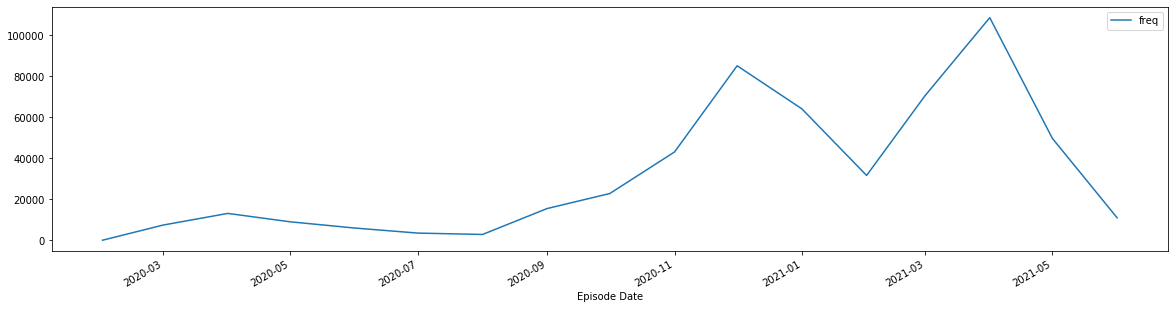

In [17]:

freq_date.plot(x="Episode Date",y="freq",kind="line",figsize=(20,5))
# fig, axes=plt.subplots(figsize=(12,6))
# axes.plot(freq_date["Episode Date"], freq_date["freq"], color="red", linewidth=3, marker="o", markersize=8, label="X^2")

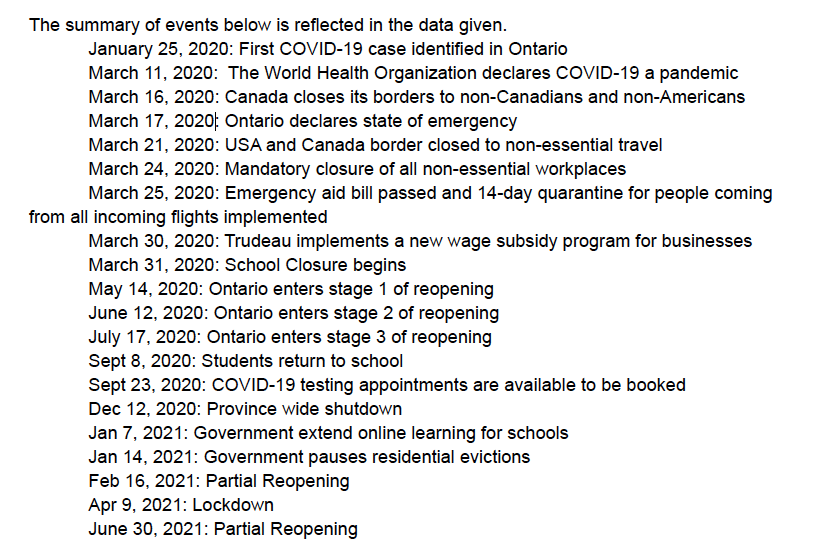

In [18]:
from IPython.display import Image

fig = Image(filename=('COVID-regulations.png'))
fig

## Observations & Analysis
### Data bias
- It is worth noticed that the episode date of 2887 cases were unknown. If these invalid
data falls in the same period, this will make the data biased, especially if they are in the
period when the number of cases is low; however, we assume that they are normally
distributed; thus, we can exclud them from the analysis.
### Observations
- The graph shows that the number of cases had three main cycle, 2020-02 to 2020-08, 2020-09 to 2021-02, and 2021-02 to 2021-06, peaking in 2020-04, 2021-12, and 2021-04 
- The graph reflects a strong relationship between the number of COVID-19 cases and the government reaction to the pandemic 
    - Each expansion period corresopds to reopenning stage, until we see a peak, lockdown measures are put in place, then comes the declining period 

- The number rising or declining almost exponentially 
- It is also worth notice that we experienced three main peaks with each one higher than the previous, this indicates that the pandemic can get worse than before



# Gender
-study the distribution by gender and how it changes overtime

In [19]:
#1 is male ; 2 is female 
gender=clean2["Gender"]
gender.value_counts()
genderpercentage=gender.value_counts()/len(covid)*100
print(genderpercentage)


Male          49.563833
Female        49.246420
Not stated     0.660665
Name: Gender, dtype: float64


In [20]:
freq_gender=clean2.groupby(["Episode Date","Gender"],as_index=False).agg({"freq":sum})
freq_gender["Episode Date"]=pd.to_datetime(freq_gender["Episode Date"])
# freq_gender["Episode Date"]=pd.to_datetime(freq_gender["Episode Date"]).dt.normalize()

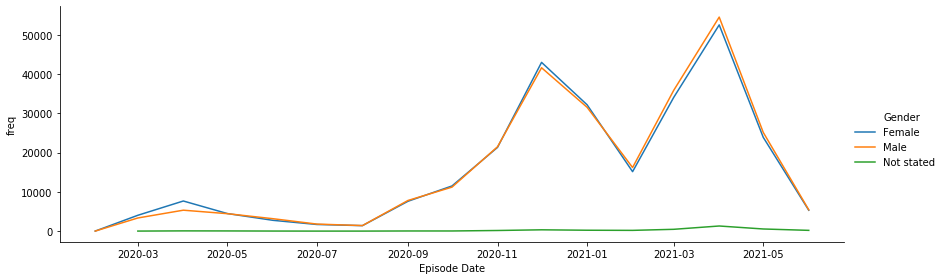

In [21]:
import seaborn as sns
sns.relplot(data=freq_gender, x="Episode Date", y="freq", hue="Gender",kind="line", height=4, aspect=3)
# freq_gender.pivot(index='Date',columns='Gender',values='freq').plot(kind='line', figsize=(8,8))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

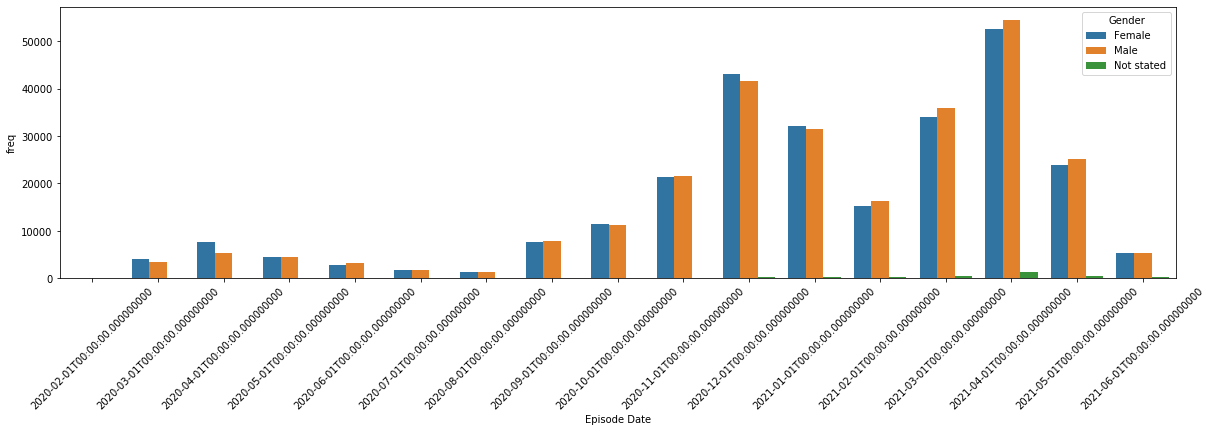

In [22]:
fig, ax1 = plt.subplots(figsize=(20, 5))
sns.barplot(data=freq_gender, x="Episode Date", y="freq", hue="Gender",ax=ax1)
plt.xticks(rotation=45)
# freq_gender.plot(x="Date",y="freq",kind="line",figsize=(20,5))

## Observations 
- The distrition between female and male is pretty even 
- It indicates that gender do not affect the likelihood of being infected 

# Occupation
- Study the distribution of cases by occupation 
- We look at occupation group: 
    - School or daycare worker/attendee, 
    - Long term care resident,
    - Health care worker, 
    - Other                       

In [23]:
occ=clean2["Occupation"]
occ.value_counts()
occpercentage=occ.value_counts()/len(clean2)*100
print(occpercentage)



School or daycare worker/attendee    21.199576
Long term care resident              16.307678
Health care worker                   16.147206
Other                                14.349777
Name: Occupation, dtype: float64


In [24]:
freq_occ=clean2.groupby(["Episode Date","Occupation"],as_index=False).agg({"freq":sum})
freq_occ["Episode Date"]=pd.to_datetime(freq_occ["Episode Date"])

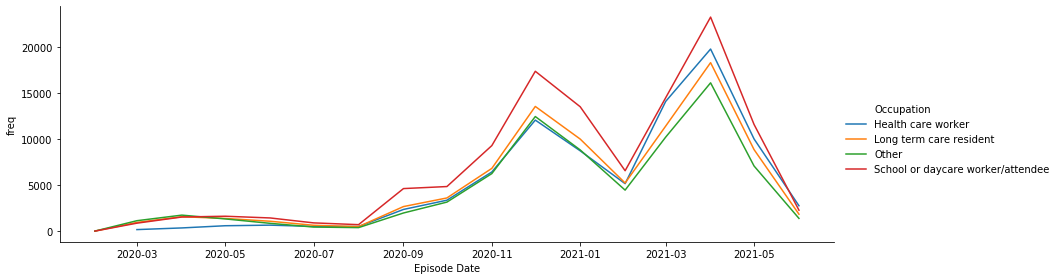

In [25]:
sns.relplot(data=freq_occ, x="Episode Date", y="freq", hue="Occupation",kind="line", height=4, aspect=3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

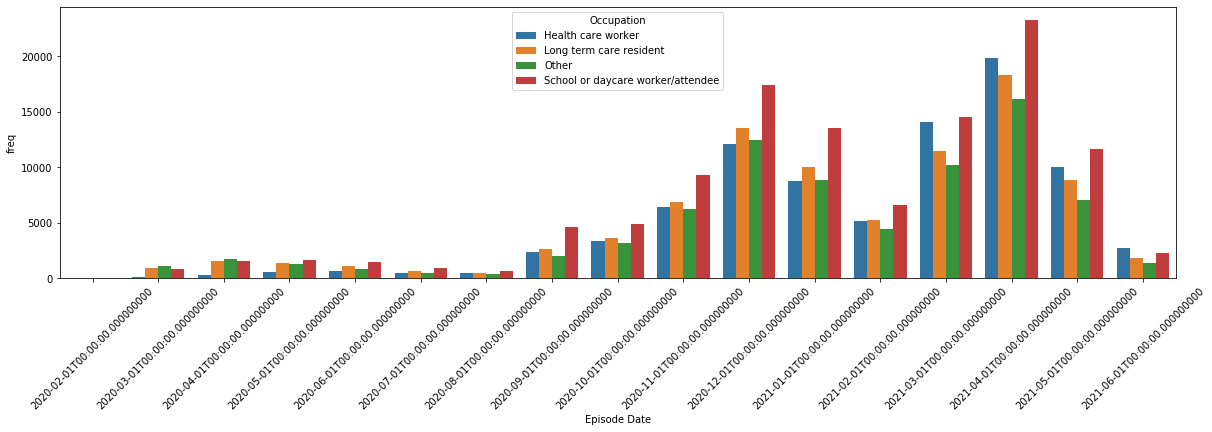

In [26]:
fig, ax1 = plt.subplots(figsize=(20, 5))
sns.barplot(data=freq_occ, x="Episode Date", y="freq", hue="Occupation",ax=ax1)
plt.xticks(rotation=45)

## Observations
- The occupation with most cases is ranked by 
    - School or daycare worker/attendee
    - Health care worker,
    - Long term care resident
    - Other
- Recall from COVID Cases section, when school reopens, we saw a big increase; this graph sugguests that school is a vulnerable public space for spreading the virus. This should 
- This should raise the awareness of the government as to delay school opening or more strict measures in school/education environment.
- Government should also implement safety measures in the health-care workplaces to protect health-care workers 

## Age

- Study the distribution of cases by Age group 

In [27]:
age=clean2["Age"]
age.value_counts()
agepercentage=age.value_counts()/len(clean2)*100
print(agepercentage)

[20,29]       21.199576
[30,39]       16.307678
[0,19]        16.147206
[40,49]       14.349777
[50,59]       14.182304
[60,69]        8.840864
[80,89]        4.535213
[70,79]        4.385795
Not stated     0.051587
Name: Age, dtype: float64


In [28]:
freq_age=clean2.groupby(["Episode Date","Age"],as_index=False).agg({"freq":sum})
freq_age["Episode Date"]=pd.to_datetime(freq_age["Episode Date"])

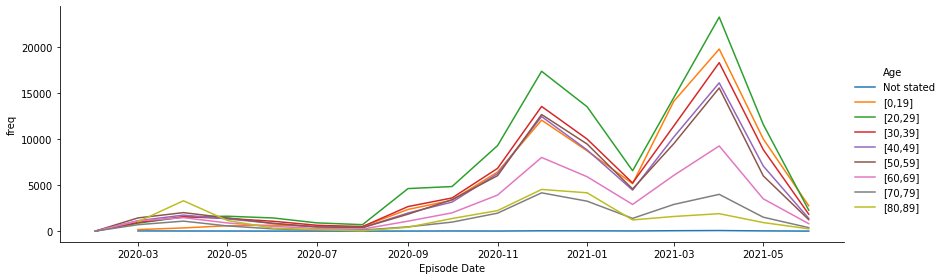

In [29]:
sns.relplot(data=freq_age, x="Episode Date", y="freq", hue="Age",kind="line", height=4, aspect=3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

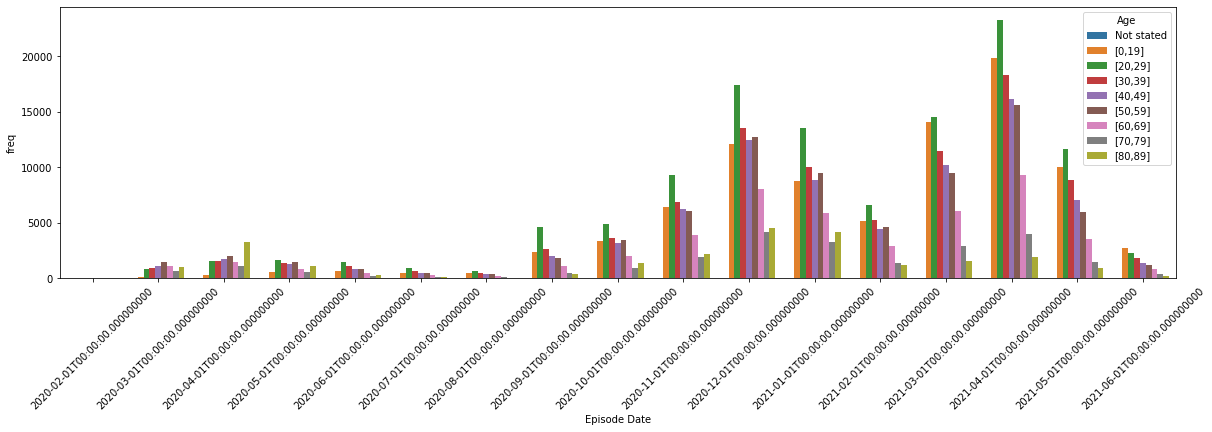

In [30]:
fig, ax1 = plt.subplots(figsize=(20, 5))
sns.barplot(data=freq_age, x="Episode Date", y="freq", hue="Age",ax=ax1)
plt.xticks(rotation=45)

## Observations 
- Age group [20,29] is most likely to be infected almost trhoughout the entire pandemic period, followed by [30,39]
- This is possibly due to the large population and high level of employment in these age groups(Statistic Canada)
- The minors [0,19] is the third most vulnerable group, suggesting the need to re-examine the information that youths being less likely to catch the virus. It also supports the analysis from Occupation where education-related job is more likely to be impacted by COVID


Reference:
https://www.statista.com/statistics/437700/employment-in-canada-by-age-group/ \
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000501

## Death

In [31]:

freq_death=clean2.groupby(["Episode Date","Death"],as_index=False).agg({"freq":sum})
# freq_date["Episode Date"]=pd.to_datetime(freq_death["Episode Date"])
freq_death= freq_death.drop(freq_death[(freq_death["Death"]=="Not stated/Unknown")].index)
freq_death["Episode Date"]=pd.to_datetime(freq_death["Episode Date"])
freq_death

,Episode Date,Death,freq
0,2020-04-01,No,11511
1,2020-04-01,Yes,1554
2,2021-04-01,No,107585
4,2021-04-01,Yes,819
5,2020-08-01,No,2807
6,2020-08-01,Yes,2
7,2020-12-01,No,83477
9,2020-12-01,Yes,1501
10,2020-02-01,No,18
11,2021-02-01,No,31195


In [32]:
death=clean2["Death"]
death.value_counts()
deathpercentage=death.value_counts()/len(clean2)*100
print(deathpercentage)


No                    98.192621
Yes                    1.581687
Not stated/Unknown     0.225692
Name: Death, dtype: float64


(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]),
 <a list of 8 Text xticklabel objects>)

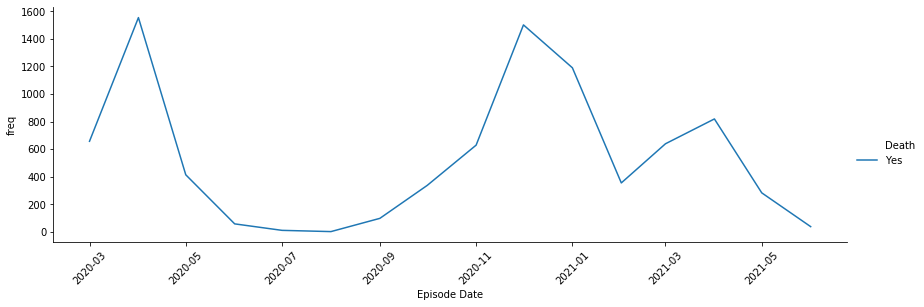

In [51]:
sns.relplot(data=freq_death2, x="Episode Date", y="freq", hue="Death",kind="line", height=4, aspect=3)

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

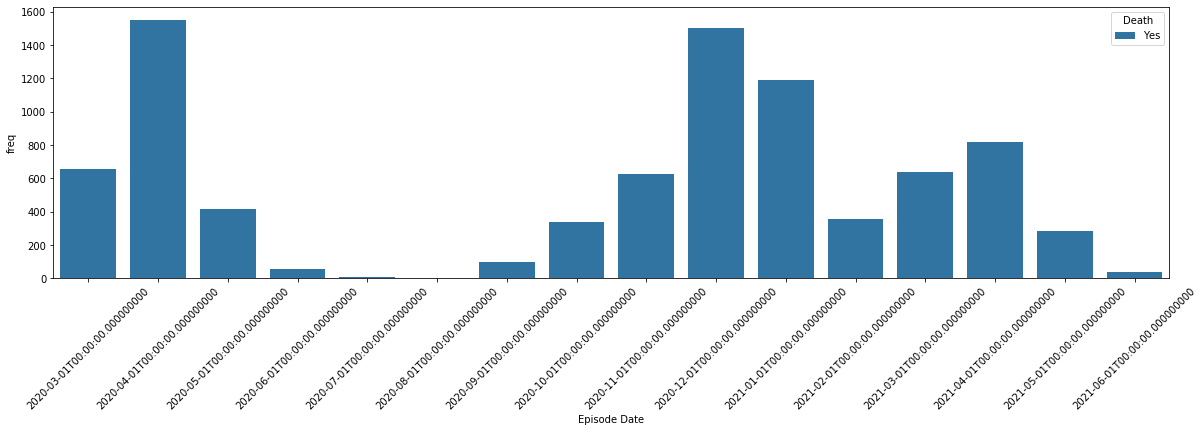

In [35]:
fig, ax1 = plt.subplots(figsize=(20, 5))
sns.barplot(data=freq_death2, x="Episode Date", y="freq", hue="Death",ax=ax1)
plt.xticks(rotation=45)

## Observations
- Death account for a small percentage, with maximum death in 2020-04 at 1400 deaths 
- Death proportion is high at early stage (April-2020) relative to total cases; in later stage, the death ratio has decreased, possibly due to vaccination 


## Transmission 
- Examine the proportion of dosmetic and international transmission 

In [36]:

freq_trm=clean2.groupby(["Episode Date","Transmission"],as_index=False).agg({"freq":sum})
freq_trm["Episode Date"]=pd.to_datetime(freq_trm["Episode Date"])

freq_trm2= freq_trm.drop(freq_trm[(freq_trm["Transmission"]=="Not stated")].index)

freq_trm2

,Episode Date,Transmission,freq
0,2020-04-01,Dosmetic,12236
1,2020-04-01,International,37
3,2021-04-01,Dosmetic,89634
5,2020-08-01,Dosmetic,2654
6,2020-08-01,International,8
8,2020-12-01,Dosmetic,72508
10,2020-02-01,Dosmetic,6
11,2020-02-01,International,12
12,2021-02-01,Dosmetic,26648
14,2021-01-01,Dosmetic,53086


In [37]:
trm=clean2["Transmission"]
trm.value_counts()
trmpercentage=trm.value_counts()/len(clean2)*100
print(trmpercentage)


Dosmetic         85.532864
Not stated       14.178435
International     0.288702
Name: Transmission, dtype: float64


(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]),
 <a list of 8 Text xticklabel objects>)

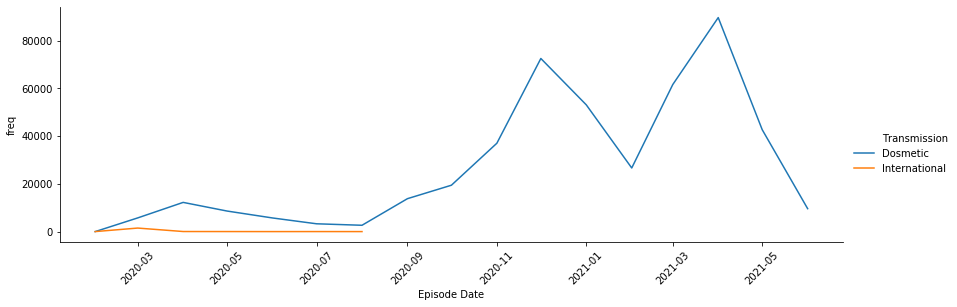

In [38]:
sns.relplot(data=freq_trm2, x="Episode Date", y="freq", hue="Transmission",kind="line", height=4, aspect=3)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

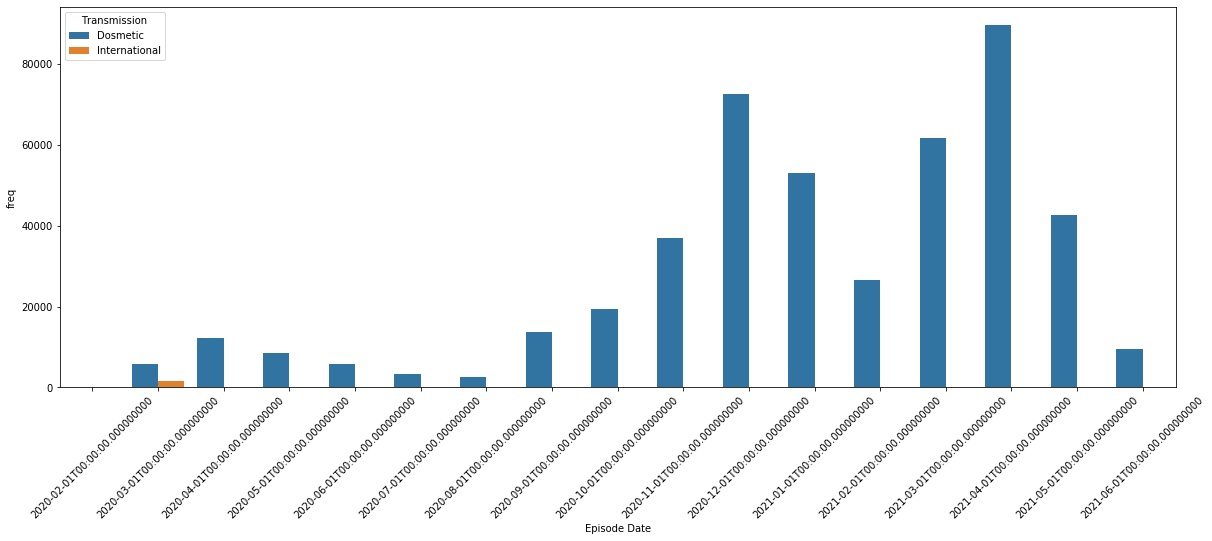

In [39]:
fig, ax1 = plt.subplots(figsize=(20, 7))
sns.barplot(data=freq_trm2, x="Episode Date", y="freq", hue="Transmission",ax=ax1)
plt.xticks(rotation=45)

## Observations 
- Intrenational transimmision occurs only in early stage of pandemic, sugguesting that the virus was orgininated outside of the countries
- In March, government closes the US border, we saw that international transmission is declining 
- The spread of the virus is coming from dosmetic transmission 
- it suggests that to prevent domestic transmission is a priority, thus provincial shut down might be more effective than closing international border


## Hospital Status 
- determined if accute care beds are sufficient in Ontario under worst circumstances

In [40]:
freq_hos=clean2.groupby(["Episode Date","Hospital status"],as_index=False).agg({"freq":sum})
freq_hos["Episode Date"]=pd.to_datetime(freq_hos["Episode Date"])

freq_hos2= freq_hos.drop(freq_hos[(freq_hos["Hospital status"]=="Not stated/Unknown")].index)
freq_hos2

,Episode Date,Hospital status,freq
0,2020-04-01,Hospitalized and in Intensive care unit,253
1,2020-04-01,"Hospitalized, but not in intensive care unit",1511
2,2020-04-01,Not hospitalized,6518
4,2021-04-01,Hospitalized and in Intensive care unit,1074
5,2021-04-01,"Hospitalized, but not in intensive care unit",4139
6,2021-04-01,Not hospitalized,24255
8,2020-08-01,Hospitalized and in Intensive care unit,2
9,2020-08-01,"Hospitalized, but not in intensive care unit",64
10,2020-08-01,Not hospitalized,700
12,2020-12-01,Hospitalized and in Intensive care unit,606


In [41]:
hos=clean2["Hospital status"]
hos.value_counts()
hospercentage=hos.value_counts()/len(clean2)*100
print(hospercentage)

Not stated/Unknown                              77.495832
Not hospitalized                                17.568974
Hospitalized, but not in intensive care unit     4.045875
Hospitalized and in Intensive care unit          0.889319
Name: Hospital status, dtype: float64


(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]),
 <a list of 8 Text xticklabel objects>)

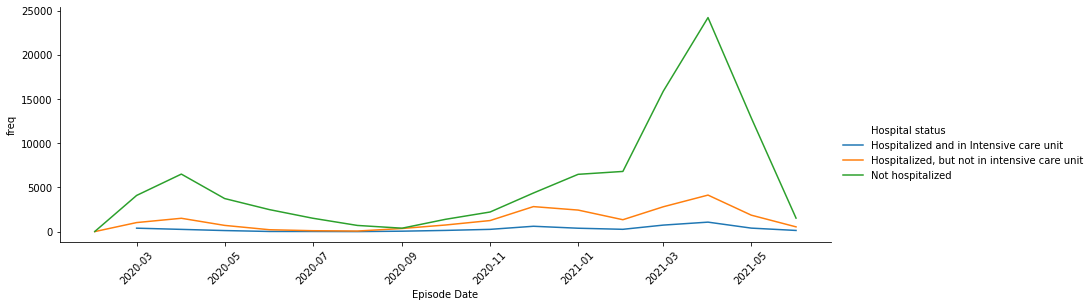

In [42]:
sns.relplot(data=freq_hos2, x="Episode Date", y="freq", hue="Hospital status",kind="line", height=4, aspect=3)
plt.xticks(rotation=45)

(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]),
 <a list of 8 Text xticklabel objects>)

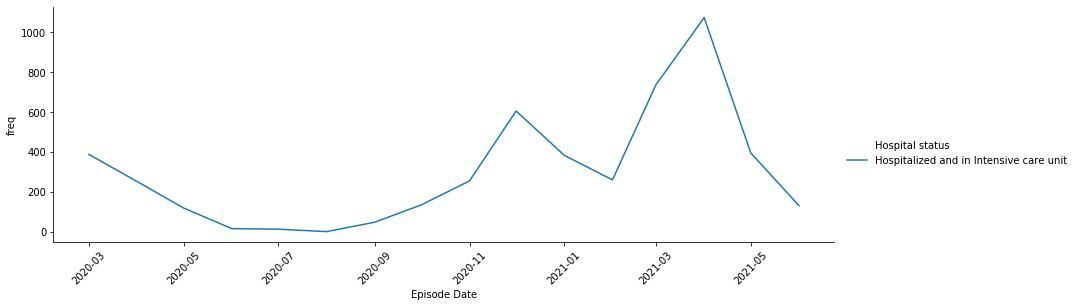

In [43]:
freq_hos3=freq_hos2.loc[freq_hos2["Hospital status"]=="Hospitalized and in Intensive care unit"]
sns.relplot(data=freq_hos3, x="Episode Date", y="freq", hue="Hospital status",kind="line", height=4, aspect=3)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

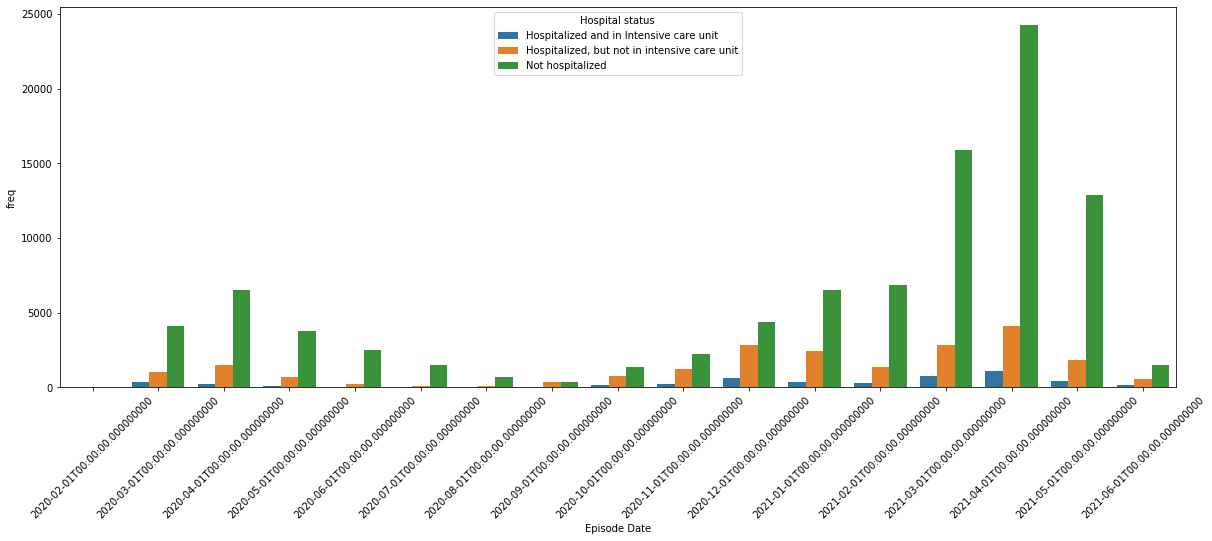

In [44]:
#freq_hos3=freq_hos2.loc[freq_hos2["Hospital status"=!"Not hospitalized"]]
fig, ax1 = plt.subplots(figsize=(20, 7))
sns.barplot(data=freq_hos2, x="Episode Date", y="freq", hue="Hospital status",ax=ax1)
plt.xticks(rotation=45)

- According to OHA (Ontario Hospital Association), there are approximately 12000 acute care beds in Ontario. If we assume 4% of the infected need to be in ICU obtained from above percentage,and half of the ICU is reserved for patients of COVID-19, then the maximum number of COVID-19 cases we can bear is 150000, which is less than  the highest cases occurred in April 2021. However, the government still need tomonitor the number of patients in ICU more closely and increase the number of acute care be accordingly